## Chapter4.1 머신 러닝의 네 가지 분류

### 지도 학습(supervised learning)
 - 샘플 데이터가 주이지면 알고 있는 타깃(꼬리표(annotation))에 입력 데이터를 매핑하는 방법을 학습.

 - Main Part : 분류, 회귀

 - 시퀀스 생성(sequence generation) : 사진이 주어지면 이를 설명하는 캡션을 생성합니다. (일련의 분류 문제)
 - 구문 트리(syntax tree)예측 : 문장이 주어지면 분해된 구문 트리를 예측
 - 물체 감지(object detection) : 사진이 주어지면 사진 안의 특정 물체 주위에 경계 상자(bounding box)를 그립니다. (회귀 + 분류)
 - 이미지 분할(image segmentation): 사진이 주어졌을 때 픽셀 단위로 특정 물체에 마스팅(masking)을 합니다.

### 비지도 학습(unsupervised learning)
    - 차원 축소(dimensionality reduction)와 군집(clustering)


### 자기 지도 학습(self-supervised learning)
 - 오토인코더(autoencoder)

### 강화 학습(reinforcement learning)

## Chapter 4.2 머신 러닝 모델 평가

 - 검증 세터에 과대적합 : 정보 누설(information leark) // 검증 세트의 모델 성능에 기반하여 모델의 하이퍼파라미터를 조정할때마다 검증 데이터에 관한 정보가 모델로 새는 것
 - 단순 홀드아웃 검증(hold-out validation), K-겹 교차 검증(k-fold cross-validation), 
셔플링(shuffling)을 사용한 반복 k-겹 교차 검증(iterated K-fold cross-validation)

 - RepeatedStratifiedKFold

### 유의점
 - 대표서 있는 데이터 : 예) 이미지 데이터의 경우 순서대로 80:20 비율로 나누면 train에는 0~7만 들어간다. shuffle 해주어야. train_test_split() 에서 stratify 매개변수로 타깃 레이블을 전달
 - 시간의 방향 : 시계열 데이터의 경우 훈련 세트에 있는 데이터보다 테스트 세트에 있는 모든 데이터가 미래의 것이어야
 - 데이터 중복 : 한 데이터셋에 어떤 데이터 포인트가 두 번 등장하면 트레인 셋과 테스트 셋에 데이터가 중복될 수 있다. 중복여부 확인! GroupKFold 클래스를 cross_validate()함수에 적용

## Chapter 4.3 데이터 전처리, 특성 공학, 특성 학습

### 신경망을 위한 데이터 전처리

#### 벡터화(data vectorziation) ex) one hot encoding

#### 값 정규화 

In [ ]:
x -= x.mean(axis=0) # 평균 0
x /= x.std(axis=0) # 표준 편차 1

#### 누락된 값 다루기

신경망에서는 0이 사전에 정의된 의미 있는 값이 아니라면 누락된 값을 0으로 입력해도 이 값을 무시한다.(0이 누락된 값이라는 것을 학습)

#### 특성 공학(feature engineering)

 - 좋은 특성은 적은 자원을 사용하여 문제를 더 멋지게 풀어낼 수 있습니다. 예를 들어 시계 바늘을 읽는 문제에 합성곱 신경망을 사용하는 것은 어울리지 않습니다.
 - 좋은 특성은 더 적은 데이터로 문제를 풀 수 있습니다. 딥러닝 모델이 스스로 특성을 학습하는 능력은 가용한 훈련 데이터가 많을 때 발휘합니다. 새믈의 개수가 적다면 특성에 있는 정보가 매우 중요해집니다.

## Chapter4.4과대적합(Overfitting)과 과소적합(Underfitting)

### 네트워크 크기 축소

 - Overfitting을 막는 가장 단순한 방법은 parameter의 수를 줄이는 것. 이를 모델의 용량(capacity)라고 한다. 

 - 예제 원본 모델 vs 더 작은 용량 모델

In [5]:
# data import
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    # 크기가 (len(sequences), dimension))이고 모든 원소가 0인 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # results[i]에서 특정 인덱스의 위치를 1로 만듭니다
    return results

# 훈련 데이터를 벡터로 변환합니다
x_train = vectorize_sequences(train_data)
# 테스트 데이터를 벡터로 변환합니다
x_test = vectorize_sequences(test_data)
# 레이블을 벡터로 변환합니다
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


In [2]:
from keras import models
from keras import layers

Using TensorFlow backend.


In [6]:
original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])


In [7]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(6, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(6, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

In [8]:
original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 124us/step - loss: 0.4439 - acc: 0.8245 - val_loss: 0.3287 - val_acc: 0.8847
Epoch 2/20
25000/25000 [==============================] - 2s 82us/step - loss: 0.2575 - acc: 0.9081 - val_loss: 0.2862 - val_acc: 0.8886
Epoch 3/20
25000/25000 [==============================] - 2s 80us/step - loss: 0.1992 - acc: 0.9287 - val_loss: 0.2822 - val_acc: 0.8886
Epoch 4/20
25000/25000 [==============================] - 2s 81us/step - loss: 0.1664 - acc: 0.9414 - val_loss: 0.2941 - val_acc: 0.8842
Epoch 5/20
25000/25000 [==============================] - 2s 79us/step - loss: 0.1426 - acc: 0.9506 - val_loss: 0.3123 - val_acc: 0.8802
Epoch 6/20
25000/25000 [==============================] - 2s 80us/step - loss: 0.1247 - acc: 0.9562 - val_loss: 0.3512 - val_acc: 0.8722
Epoch 7/20
25000/25000 [==============================] - 2s 80us/step - loss: 0.1094 - acc: 0.9622 - val_loss: 0.3599 - val_ac

In [9]:
smaller_model_hist = smaller_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 2s 87us/step - loss: 0.5670 - acc: 0.7406 - val_loss: 0.4849 - val_acc: 0.8258
Epoch 2/20
25000/25000 [==============================] - 2s 79us/step - loss: 0.3924 - acc: 0.8892 - val_loss: 0.3612 - val_acc: 0.8785
Epoch 3/20
25000/25000 [==============================] - 2s 80us/step - loss: 0.2795 - acc: 0.9172 - val_loss: 0.3012 - val_acc: 0.8876
Epoch 4/20
25000/25000 [==============================] - 2s 79us/step - loss: 0.2212 - acc: 0.9275 - val_loss: 0.2822 - val_acc: 0.8899
Epoch 5/20
25000/25000 [==============================] - 2s 79us/step - loss: 0.1876 - acc: 0.9378 - val_loss: 0.2814 - val_acc: 0.8866
Epoch 6/20
25000/25000 [==============================] - 2s 79us/step - loss: 0.1647 - acc: 0.9451 - val_loss: 0.2858 - val_acc: 0.8856
Epoch 7/20
25000/25000 [==============================] - 2s 79us/step - loss: 0.1465 - acc: 0.9518 - val_loss: 0.2954 - val_acc

In [10]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

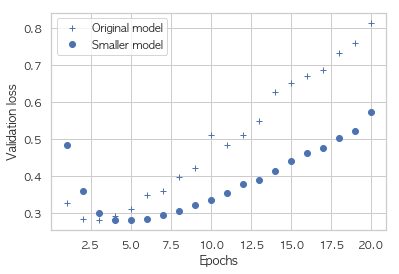

In [14]:
# ‘b+’는 파란색 덧셈 기호을 의미합니다
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

- 작은 네트워크가 원래 네트워크보다 더 늦게(많은 Epochs에서) 과대적합되기 시작했다. 

In [17]:
# 더 큰 용량을 가진 네트워크
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(1024, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(1024, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])


In [18]:
bigger_model_hist = bigger_model.fit(x_train, y_train,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(x_test, y_test))


Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 13s 514us/step - loss: 0.5525 - acc: 0.7849 - val_loss: 0.2828 - val_acc: 0.8846
Epoch 2/20
25000/25000 [==============================] - 12s 496us/step - loss: 0.2171 - acc: 0.9151 - val_loss: 0.2862 - val_acc: 0.8860
Epoch 3/20
25000/25000 [==============================] - 12s 493us/step - loss: 0.1278 - acc: 0.9591 - val_loss: 0.4356 - val_acc: 0.8483
Epoch 4/20
25000/25000 [==============================] - 12s 497us/step - loss: 0.0907 - acc: 0.9802 - val_loss: 0.4555 - val_acc: 0.8836
Epoch 5/20
25000/25000 [==============================] - 13s 501us/step - loss: 0.1105 - acc: 0.9876 - val_loss: 0.5347 - val_acc: 0.8661
Epoch 6/20
25000/25000 [==============================] - 13s 508us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.6572 - val_acc: 0.8783
Epoch 7/20
25000/25000 [==============================] - 13s 501us/step - loss: 0.1310 - acc: 0.9844 - val_loss: 0.

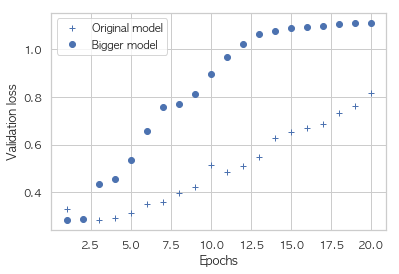

In [19]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

 - Bigger model이 더 먼저 과대적합하기 시작했다.

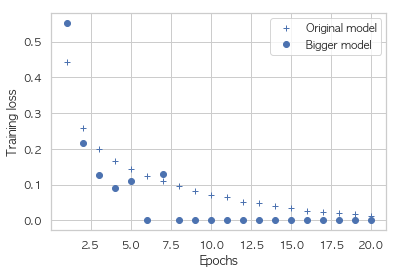

In [20]:
original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()


 - Training data 에서 loss를 비교 : Bigger model 에서 더 빨리 0으로 수렴(과대적합 의심)

### 가중치 규제 추가

- 가중치 규제(weight regularization) : 네트워크 복잡도에 제한을 두어 가중치가 작은 값을 가지도록 강제하는 것. 가중치 값의 분포가 더 균일하게 된다.
    - L1 규제: 가중치가 절대값에 비례하는 비용이 추가
    - L2 규제 : 가중치의 제곱에 비례하는 비용이 추가. called 가중치 감쇠(weight decay)

In [21]:
# 영하 리뷰에 가중치 규제 (L2) 추가
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))


In [22]:
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [23]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))


Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 2s 94us/step - loss: 0.4879 - acc: 0.8152 - val_loss: 0.3889 - val_acc: 0.8660
Epoch 2/20
25000/25000 [==============================] - 2s 82us/step - loss: 0.3100 - acc: 0.9059 - val_loss: 0.3305 - val_acc: 0.8890
Epoch 3/20
25000/25000 [==============================] - 2s 82us/step - loss: 0.2657 - acc: 0.9202 - val_loss: 0.3301 - val_acc: 0.8873
Epoch 4/20
25000/25000 [==============================] - 2s 83us/step - loss: 0.2456 - acc: 0.9285 - val_loss: 0.3409 - val_acc: 0.8820
Epoch 5/20
25000/25000 [==============================] - 2s 83us/step - loss: 0.2320 - acc: 0.9350 - val_loss: 0.3801 - val_acc: 0.8684
Epoch 6/20
25000/25000 [==============================] - 2s 81us/step - loss: 0.2234 - acc: 0.9391 - val_loss: 0.3659 - val_acc: 0.8757
Epoch 7/20
25000/25000 [==============================] - 2s 81us/step - loss: 0.2166 - acc: 0.9417 - val_loss: 0.3755 - val_acc

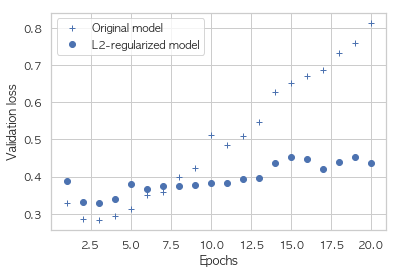

In [24]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

- L2 규제를 추가한것이 훨씬 더 과대적합을 피하고있다.

In [25]:
# 다른 가중치 규제
from keras import regularizers

regularizers.l1(0.001) # L1규제

regularizers.l1_l2(l1=0.001, l2=0.001) # L1, L2 병행규제

### 드롭아웃(dropout) 추가

 - 훈련하는 동안 무작위로 층의 일부 출력 특성을 제외시킨다.(w=0) 
 - 드랍아웃 비율 : 0이 될 특성의 비율 // 보통 0.2 ~ 0.5

In [28]:
# dropout model
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

In [29]:
dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 101us/step - loss: 0.5906 - acc: 0.6841 - val_loss: 0.4329 - val_acc: 0.8622
Epoch 2/20
25000/25000 [==============================] - 2s 85us/step - loss: 0.4359 - acc: 0.8180 - val_loss: 0.3485 - val_acc: 0.8693
Epoch 3/20
25000/25000 [==============================] - 2s 82us/step - loss: 0.3469 - acc: 0.8707 - val_loss: 0.2898 - val_acc: 0.8881
Epoch 4/20
25000/25000 [==============================] - 2s 82us/step - loss: 0.2881 - acc: 0.8986 - val_loss: 0.2766 - val_acc: 0.8880
Epoch 5/20
25000/25000 [==============================] - 2s 84us/step - loss: 0.2533 - acc: 0.9143 - val_loss: 0.2803 - val_acc: 0.8880
Epoch 6/20
25000/25000 [==============================] - 2s 84us/step - loss: 0.2221 - acc: 0.9264 - val_loss: 0.2882 - val_acc: 0.8874
Epoch 7/20
25000/25000 [==============================] - 2s 84us/step - loss: 0.1966 - acc: 0.9357 - val_loss: 0.3260 - val_ac

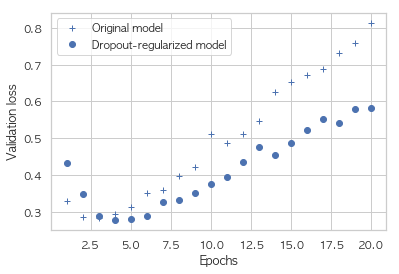

In [30]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()